In [12]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as snsr

In [25]:
#Load the data into a Pandas DataFrame
data_path = '/Users/felic/OneDrive/Desktop/Resources/Sales_data.csv'


In [26]:
sales_data = pd.read_csv(data_path)

In [37]:
# Ensure columns exist before processing them
columns_to_check = ['Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating', 
                    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in columns_to_check:
    if column not in sales_data.columns:
        print(f"Warning: Column '{column}' not found in the dataset.")

In [38]:
# Handling missing values
if 'Year_of_Release' in sales_data.columns:
    sales_data.loc[:, 'Year_of_Release'] = sales_data['Year_of_Release'].fillna(sales_data['Year_of_Release'].median())
if 'Genre' in sales_data.columns:
    sales_data.loc[:, 'Genre'] = sales_data['Genre'].fillna('Unknown')
if 'Publisher' in sales_data.columns:
    sales_data.loc[:, 'Publisher'] = sales_data['Publisher'].fillna('Unknown')
if 'Developer' in sales_data.columns:
    sales_data.loc[:, 'Developer'] = sales_data['Developer'].fillna('Unknown')
if 'Rating' in sales_data.columns:
    sales_data.loc[:, 'Rating'] = sales_data['Rating'].fillna('Unknown')
if 'Critic_Score' in sales_data.columns:
    sales_data.loc[:, 'Critic_Score'] = sales_data['Critic_Score'].fillna(sales_data['Critic_Score'].median())
if 'Critic_Count' in sales_data.columns:
    sales_data.loc[:, 'Critic_Count'] = sales_data['Critic_Count'].fillna(sales_data['Critic_Count'].median())
if 'User_Score' in sales_data.columns:
    sales_data.loc[:, 'User_Score'] = sales_data['User_Score'].replace('tbd', None)
    sales_data.loc[:, 'User_Score'] = pd.to_numeric(sales_data['User_Score'], errors='coerce')
    sales_data.loc[:, 'User_Score'] = sales_data['User_Score'].fillna(sales_data['User_Score'].median())
if 'User_Count' in sales_data.columns:
    sales_data.loc[:, 'User_Count'] = sales_data['User_Count'].fillna(sales_data['User_Count'].median())

In [39]:
# Ensure all numeric columns exist before standardizing
numeric_cols = [col for col in numeric_cols if col in sales_data.columns]
scaler = StandardScaler()
sales_data[numeric_cols] = scaler.fit_transform(sales_data[numeric_cols])

In [40]:
# Drop non-numerical columns
sales_data = sales_data.drop(columns=['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'])

In [41]:
# Convert 'User_Score' to numeric, replacing 'tbd' with NaN and converting
sales_data['User_Score'] = sales_data['User_Score'].replace('tbd', None)
sales_data['User_Score'] = pd.to_numeric(sales_data['User_Score'], errors='coerce')


In [42]:
# Handle missing values by filling them with the median of each column
sales_data = sales_data.fillna(sales_data.median())


In [21]:
# Display the cleaned dataset
print(sales_data.head())
print(sales_data.dtypes)


   Year_of_Release   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
0        -0.084985  50.518992  57.255699  11.956905    45.005218   
1        -3.686001  35.423530   6.825337  21.801182     3.870656   
2         0.257969  18.951283  25.066106  12.021669    17.367934   
3         0.429446  18.865234  21.429874  10.370162    15.546873   
4        -1.799754  13.530193  17.376370  32.843612     5.102551   

   Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
0     52.973092      0.612632      2.027606    0.652155    0.612040   
1     25.652008      0.101177     -0.193135    0.165632   -0.163264   
2     22.602694      1.226377      3.656150    0.944069    1.618895   
3     20.826080      1.021795      3.656150    0.652155    0.273821   
4     19.921623      0.101177     -0.193135    0.165632   -0.163264   

   NA_Sales_Prop  EU_Sales_Prop  JP_Sales_Prop  Other_Sales_Prop  Best_Seller  \
0       0.953673       1.080845       0.225717          0.849586            1   
1 

In [44]:

# Feature Engineering for K-Means Clustering
if 'Global_Sales' in sales_data.columns:
    sales_data.loc[:, 'NA_Sales_Prop'] = sales_data['NA_Sales'] / sales_data['Global_Sales']
    sales_data.loc[:, 'EU_Sales_Prop'] = sales_data['EU_Sales'] / sales_data['Global_Sales']
    sales_data.loc[:, 'JP_Sales_Prop'] = sales_data['JP_Sales'] / sales_data['Global_Sales']
    sales_data.loc[:, 'Other_Sales_Prop'] = sales_data['Other_Sales'] / sales_data['Global_Sales']


In [45]:
# Standardizing the numeric columns
numeric_cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
scaler = StandardScaler()
sales_data[numeric_cols] = scaler.fit_transform(sales_data[numeric_cols])

In [46]:
# Feature Engineering for K-Means Clustering
sales_data.loc[:, 'NA_Sales_Prop'] = sales_data['NA_Sales'] / sales_data['Global_Sales']
sales_data.loc[:, 'EU_Sales_Prop'] = sales_data['EU_Sales'] / sales_data['Global_Sales']
sales_data.loc[:, 'JP_Sales_Prop'] = sales_data['JP_Sales'] / sales_data['Global_Sales']
sales_data.loc[:, 'Other_Sales_Prop'] = sales_data['Other_Sales'] / sales_data['Global_Sales']

In [50]:
# Feature Engineering for Binary Classification
if 'Global_Sales' in sales_data.columns:
    threshold = sales_data['Global_Sales'].quantile(0.90)
    sales_data.loc[:, 'Best_Seller'] = (sales_data['Global_Sales'] >= threshold).astype(int)
if 'Genre' in sales_data.columns:
    label_encoder = LabelEncoder()
    sales_data.loc[:, 'Genre_Encoded'] = label_encoder.fit_transform(sales_data['Genre'])

if 'Year_of_Release' in sales_data.columns:
    sales_data.loc[:, 'Game_Age'] = 2024 - sales_data['Year_of_Release']


In [54]:
# K-Means Clustering with 4 clusters
clustering_features = sales_data[['NA_Sales_Prop', 'EU_Sales_Prop', 'JP_Sales_Prop', 'Other_Sales_Prop']]
kmeans = KMeans(n_clusters=4, random_state=42)
sales_data.loc[:, 'Cluster'] = kmeans.fit_predict(clustering_features)

In [55]:
# Ensure that only numeric columns are selected for mean calculation
numeric_columns_for_analysis = ['NA_Sales_Prop', 'EU_Sales_Prop', 'JP_Sales_Prop', 'Other_Sales_Prop']


In [56]:
# Analyzing the clusters
cluster_analysis = sales_data.groupby('Cluster')[numeric_columns_for_analysis].mean()
print(cluster_analysis)


         NA_Sales_Prop  EU_Sales_Prop  JP_Sales_Prop  Other_Sales_Prop
Cluster                                                               
0             0.996318       1.008766       0.219293          0.864101
1           136.064111     106.965301    -578.347140         87.364030
2           -10.545744     -35.306857     105.848724        -23.925356
3           -87.256161      28.189118     183.795898          9.522369


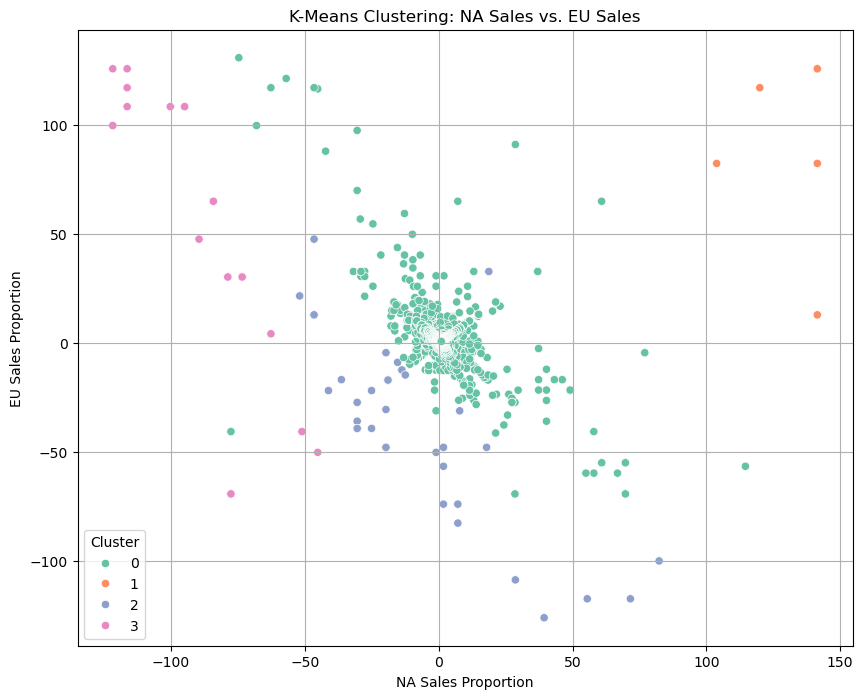

In [57]:
# Visualizing the clusters with a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sales_data, x='NA_Sales_Prop', y='EU_Sales_Prop', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering: NA Sales vs. EU Sales')
plt.xlabel('NA Sales Proportion')
plt.ylabel('EU Sales Proportion')
plt.grid(True)
plt.show()

In [58]:
********Cluster Analysis:

	***	Cluster 0 (Green Points):
	**Concentration: This cluster is the most densely populated and centered around the origin, meaning the games in this cluster have more balanced sales proportions across both North America and Europe.
		Sales Balance: Games in this cluster have sales that are fairly evenly distributed between NA and EU, with neither region dominating the other.
	***Market Strategy: These games might appeal broadly across both regions, making them good candidates for global marketing strategies.
	***	Cluster 1 (Pink Points):
	**	Concentration: There are fewer points in this cluster, and they are somewhat scattered, mostly on the left side of the plot.
	**	Sales Performance: This cluster likely represents games with lower NA sales and varying EU sales. Some games in this cluster may perform better in Europe, or have more niche appeal in both regions.
	**	Market Strategy: This cluster may contain games that need a targeted approach to improve sales in NA or could focus on niche markets in Europe.
	***	Cluster 2 (Blue Points):
**	Concentration: Points in this cluster are spread across the plot, with some points showing very low or even negative sales proportions.
	**	Sales Performance: These games might have weaker performance overall, with particularly poor sales in either NA or EU, potentially indicating regional preferences or market entry failures.
	**Market Strategy: Games in this cluster might benefit from market-specific strategies, potentially focusing on improving localization or adjusting content to better fit regional tastes.
	***	Cluster 3 (Red Points):
	**	Outliers: This cluster has very few points, and they appear to be outliers in terms of sales proportions, with some showing extreme values (very high NA sales, very low EU sales, or vice versa).
	**Sales Performance: These could represent games that are very popular in one region but not the other. For instance, a game might be a blockbuster in NA but barely sell in EU, or the opposite.
	**	Market Strategy: These games might require careful analysis to understand why they have such unbalanced sales and whether it’s worth trying to boost sales in the weaker region or focus entirely on their strong region.

********Overall Insights:

	***Balanced vs. Unbalanced Markets: The largest cluster (Cluster 0) suggests that many games have balanced sales across NA and EU. However, the existence of smaller clusters with more extreme sales distributions suggests that there are games with region-specific appeal.
	***Outliers: The red points in Cluster 3 are particularly interesting as they represent outliers with significant imbalances in sales between NA and EU, indicating potential opportunities for targeted marketing.
	***Diverse Strategies: Each cluster represents different market dynamics, and games within each cluster could benefit from tailored strategies depending on their sales distribution.

***This analysis can help guide marketing efforts, game development focus, and resource allocation by understanding which games perform better in specific regions and why. If you need a more detailed breakdown or further analysis, feel free to ask!
*********

SyntaxError: invalid character '•' (U+2022) (1816356973.py, line 4)